In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, Concatenate, MaxPool2D, Dropout, Flatten, GlobalAvgPool2D

from tensorflow.keras.applications import ResNet101

from tensorflow.keras.preprocessing.image import ImageDataGenerator

NNs for Images

In [ ]:
(mnist_attributes_train, mnist_labels_train), (mnist_attributes_test, mnist_labels_test) = mnist.load_data()

In [ ]:
mnist_attributes_train.shape

(60000, 28, 28)

In [ ]:
(2000 * 1000 * 3 + 1) * 256

1536000256

In [ ]:
256 * 9

2304

In [ ]:
mnist_attributes_train = tf.expand_dims(mnist_attributes_train, -1).numpy()
mnist_attributes_test = tf.expand_dims(mnist_attributes_test, -1).numpy()

In [ ]:
INPUT_SHAPE = mnist_attributes_train.shape[1:]
NUM_CLASSES = len(set(mnist_labels_train))

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model = Sequential([
    Input(INPUT_SHAPE),
    Conv2D(32, 3, padding = "same", strides = 2, activation = "relu"),
    Conv2D(32, 3, padding = "same", activation = "relu"),
    MaxPool2D(),
    Conv2D(16, 3, padding = "same", strides = 2, activation = "relu"),
    Conv2D(16, 3, padding = "same", activation = "relu"),

    # Flatten(),
    GlobalAvgPool2D(),

    Dense(16, activation = "relu"),
    Dropout(0.05),
    Dense(NUM_CLASSES, activation = "softmax"),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 32)          0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          4624      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 global_average_pooling2d (  (None, 16)                0         
 GlobalAveragePooling2D)                                

In [ ]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy")

In [ ]:
history = model.fit(mnist_attributes_train, mnist_labels_train, epochs = 5, validation_split = 0.1)

Epoch 1/5
1688/1688 [==============================] - 51s 28ms/step - loss: 0.5384 - val_loss: 0.1031
Epoch 2/5
1688/1688 [==============================] - 47s 28ms/step - loss: 0.1434 - val_loss: 0.0674
Epoch 3/5
1688/1688 [==============================] - 41s 24ms/step - loss: 0.0992 - val_loss: 0.0739
Epoch 4/5
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0798 - val_loss: 0.0576
Epoch 5/5
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0675 - val_loss: 0.0758


In [ ]:
model.evaluate(mnist_attributes_test, mnist_labels_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0722


0.07221730798482895

In [ ]:
model.save_weights("model_global_pooling.h5")

In [ ]:
len(model.layers[0].weights)

2

In [ ]:
model.layers[0].kernel.shape

TensorShape([3, 3, 1, 32])

In [ ]:
model.layers[0].kernel[:, :, :, 0].shape

TensorShape([3, 3, 1])

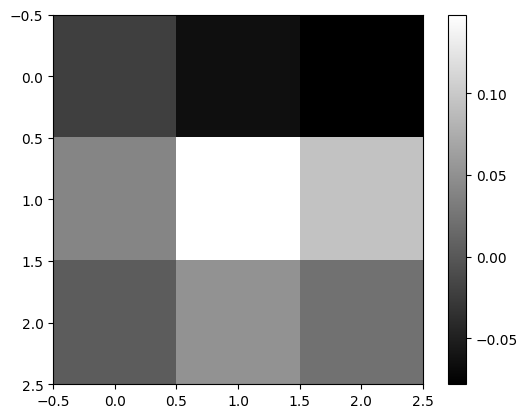

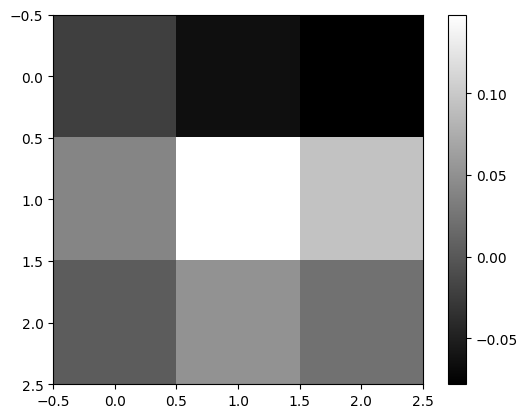

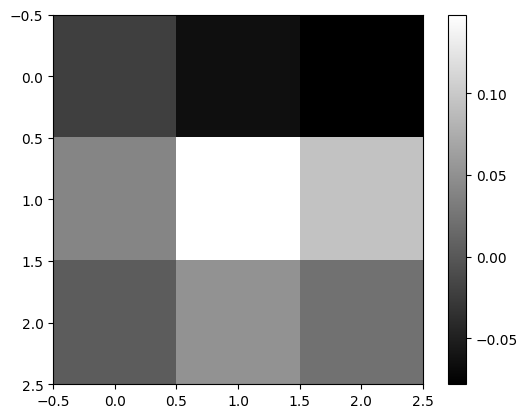

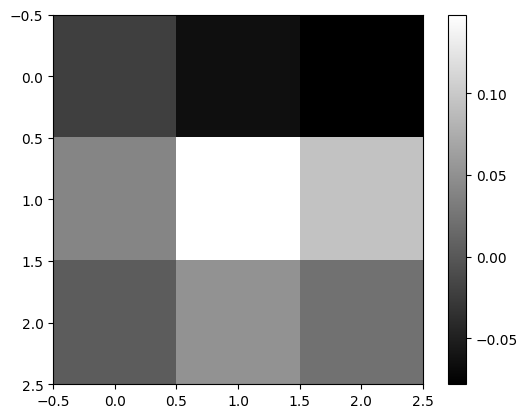

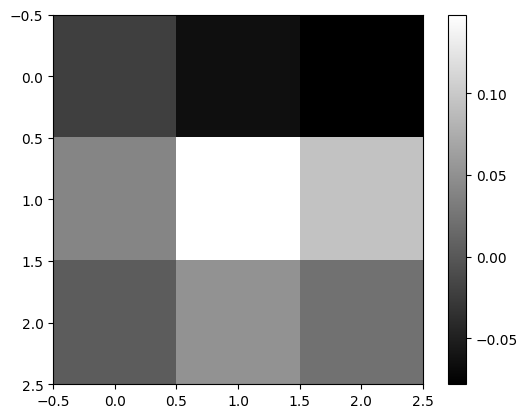

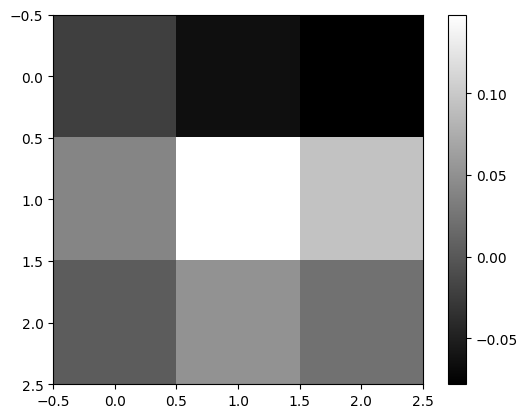

In [ ]:
for i in range(6):
  plt.imshow(model.layers[0].kernel[:, :, :, 0], cmap = "gray")
  plt.colorbar()
  plt.show()

In [ ]:
model.layers[3].kernel.shape

TensorShape([3, 3, 32, 16])

In [ ]:
input = Input((20, 20, 32))

In [ ]:
x = Conv2D(32, (3, 3), padding = "same", activation = "relu")(input)

resnet_block_start = Conv2D(32, (3, 3), padding = "same", activation = "relu")(x)

long_path = Conv2D(32, (3, 3), padding = "same", activation = "relu")(resnet_block_start)
long_path = Conv2D(32, (3, 3), padding = "same", activation = "relu")(long_path)
long_path = Conv2D(32, (3, 3), padding = "same", activation = "relu")(long_path)
long_path = Conv2D(32, (3, 3), padding = "same", activation = "relu")(long_path)
long_path = Conv2D(32, (3, 3), padding = "same", activation = "relu")(long_path)
long_path = Conv2D(32, (3, 3), padding = "same", activation = "relu")(long_path)
long_path = Conv2D(32, (3, 3), padding = "same", activation = "relu")(long_path)
long_path = Conv2D(32, (3, 3), padding = "same", activation = "relu")(long_path)

concat = Concatenate()([long_path, resnet_block_start])

x = Conv2D(32, (3, 3), activation = "relu")(concat)

In [ ]:
x

<KerasTensor: shape=(None, 18, 18, 32) dtype=float32 (created by layer 'conv2d_14')>

In [ ]:
resnet_block = Model(inputs = [resnet_block_start], outputs = [concat])

In [ ]:
resnet_block.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 20, 20, 32)]         0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 20, 20, 32)           9248      ['input_3[0][0]']             
                                                                                                  
 conv2d_7 (Conv2D)           (None, 20, 20, 32)           9248      ['conv2d_6[1][0]']            
                                                                                                  
 conv2d_8 (Conv2D)           (None, 20, 20, 32)           9248      ['conv2d_7[1][0]']            
                                                                                              

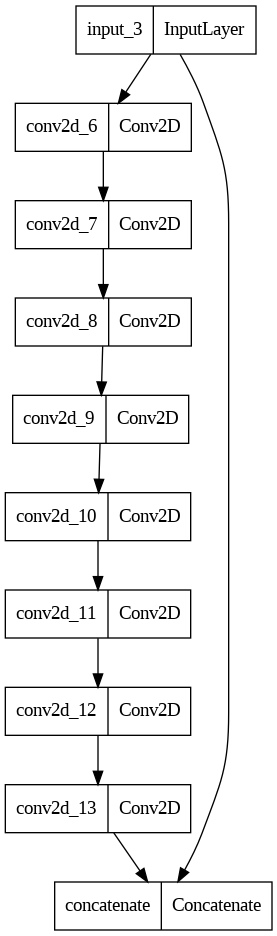

In [ ]:
tf.keras.utils.plot_model(resnet_block)

In [ ]:
Concatenate()([concat, concat])

<KerasTensor: shape=(None, 20, 20, 128) dtype=float32 (created by layer 'concatenate_1')>

In [ ]:
x = Conv2D(32, (1, 1))(input)

In [ ]:
one_by_one_conv = Model(inputs = [input], outputs = [x])

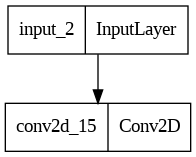

In [ ]:
tf.keras.utils.plot_model(one_by_one_conv)

In [ ]:
one_by_one_conv.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20, 20, 32)]      0         
                                                                 
 conv2d_15 (Conv2D)          (None, 20, 20, 32)        1056      
                                                                 
Total params: 1056 (4.12 KB)
Trainable params: 1056 (4.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
resnet = ResNet101(weights = "imagenet", include_top = False)

171446536/171446536 [==============================] - 7s 0us/step


In [ ]:
resnet.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_7[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                      

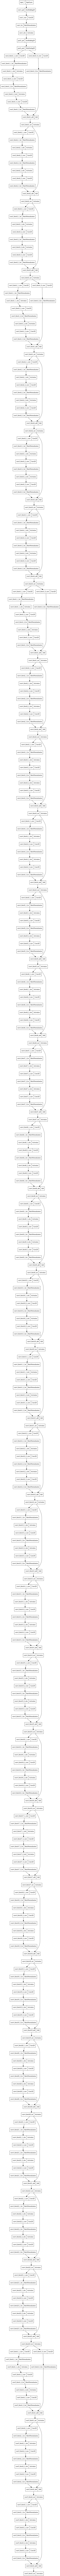

In [ ]:
tf.keras.utils.plot_model(resnet)

In [ ]:
x = Dense(NUM_CLASSES, activation = "softmax")(resnet.output)

In [ ]:
x

<KerasTensor: shape=(None, None, None, 10) dtype=float32 (created by layer 'dense_3')>

In [ ]:
for layer in resnet.layers:
  layer.trainable = False

In [ ]:
resnet.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_7[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                      

In [ ]:
import keras_cv

Using TensorFlow backend


In [ ]:
keras_cv.models.ResNet101V2Backbone()

In [ ]:
classifier = keras_cv.models.ImageClassifier(backbone = keras_cv.models.ResNet101V2Backbone(), num_classes = NUM_CLASSES)

In [ ]:
keras_cv.bounding_box

In [ ]:
image_settings = ImageDataGenerator()

In [ ]:
training_data = image_settings.flow_from_directory("/content/gdrive/MyDrive/training_data/")

FileNotFoundError: ignored

In [ ]:
batch = next(trainng_data)

In [ ]:
len(batch)

In [ ]:
batch[0].shape

In [ ]:
batch[1].shape